# Linear Regression (Part 1)

Often we model the relationship between features and outcomes by fitting a mathematical function to the data. As the name suggests, linear regression fits linear (affine) functions.


## Simple linear regression


A simple linear model relating a single feature to an outcome:

$$
y_i = \theta_0 + \theta_1 \cdot x_i + \epsilon_i
$$


Notice, this is the equation of the line:

 - $\theta_1$ is the coefficient of $x$ (the slope)
 - $\theta_0$ is the intercept
 - $\epsilon$ is the modeling error or residual
 

When we start the modeling process, we have our data ($x_i$, $y_i$) and we train the model to find the "best" values for the parameters $\theta_i$. Once trained (we've fit values for $\theta_0$ and $\theta_1$), we predict an outcome as:

$$
\hat{y}_i = \theta_0 + \theta_1 \cdot x_i
$$

The **residual** is the difference between the true value and the prediction, the error in our model's prediction:

$$
y_i - \hat{y}_i = \epsilon
$$


*Note*: A notational convention is to use lowercase letters with subscripts to denote individual values (e.g. $x_i$, $\theta_i$) and uppercase letters to represent an array/matrix of values (e.g. $X$, $\Theta$).
### Fitting the model

We are looking for the "best" values for $\theta_i$, but how do we decide what is best?

### Cost functions
The loss function for a linear regression model is typically either:

 - *squared error* (most common),  $L(\Theta) = (y_i - \hat{y}_i)^2$
 <br>

 - *absolute error* (used when outliers are problematic and not a built-in cost function in sklearn),  $L(\Theta) = |y_i - \hat{y}_i|$  

The cost function is generally the mean of the loss over all the data:

 - *mean squared error (MSE)*,  $J(\Theta) = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$
 <br>
 
 - *mean absolute error (MAE)*,  $J(\Theta) = \frac{1}{n}\sum_{i=1}^n|y_i - \hat{y}_i|$


 ### Assessing the model

 *Coefficient of determination ($R^2$)* quantifies how much of the variation in the data are explained by the linear model.

 $$
 R^2 = 1 - \frac{SS_{residual}}{SS_{total}}
 $$ 

 where

 $$
 SS_{residual} = \sum_i (y_i - \hat{y}_i)^2\\
 SS_{total} = \sum_i (y_i - \bar{y})^2
$$

For example, an $R^2 = 0.68$ implies that 68% of the variance is captured by the model.
<br>

 - $R^2=1$ implies that the model fits the data perfectly, without error.
<br>

 - $R^2=0$ implies that the model is no better than predicting the sample mean of training outcomes for every outcome (ignoring the features).

### An Example from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

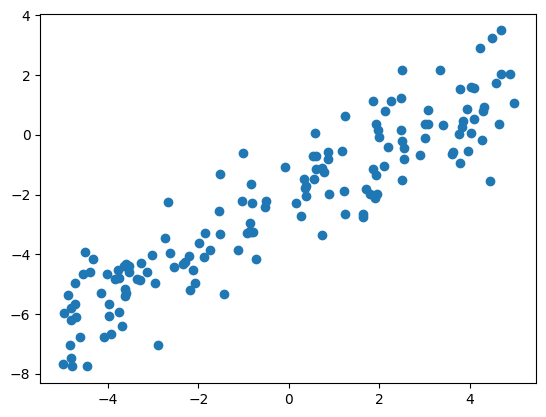

In [2]:
num_data = 150

np.random.seed(1)
X = np.sort(10*np.random.rand(num_data)-5)
y = 0.8 * X - 2.3 + np.random.randn(num_data)  # slope = 0.8, intercept = -2.3

plt.scatter(X, y)
plt.show()

First, we'll fit a model with just one parameter, $y_i = \theta_1 * x_i$. This is the equation of a line that passes through the origin (y-intercept is 0).

Let's look at the residiuals if $\theta_1 = 0$.

In [3]:
def linear_model(w1 = 0, w0 = 0):
    return lambda x: w1 * x + w0

calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)


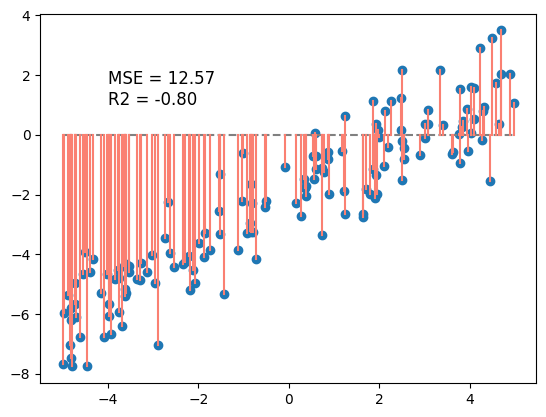

In [4]:

model_0 = linear_model(w1=0, w0=0)

y0_pred = model_0(X)

MSE_0 = calc_MSE(y, y0_pred)
R2_0 = calc_R2(y, y0_pred)

plt.scatter(X, y)
plt.plot(X, y0_pred, color='gray', linestyle = '--')
plt.plot(np.vstack((X, X)), np.vstack((y0_pred, y)), color='salmon')
plt.text(-4, 1, f'MSE = {MSE_0:.2f}\nR2 = {R2_0:.2f}', fontsize=12)
plt.show()


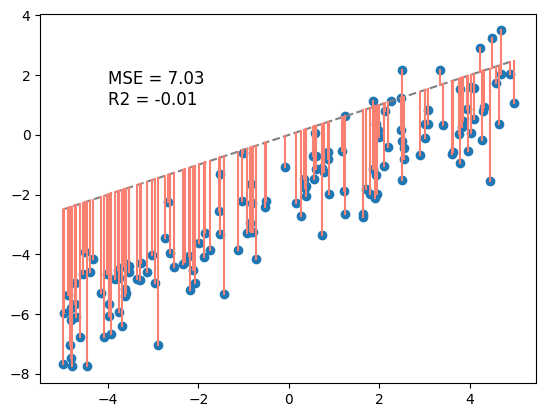

In [5]:
model_1 = linear_model(w1=0.5, w0=0)

y1_pred = model_1(X)

residuals = y - y1_pred
MSE_1 = calc_MSE(y, y1_pred)
R_1 = calc_R2(y, y1_pred)

plt.scatter(X, y)
plt.plot(X, y1_pred, color='gray', linestyle = '--')
plt.plot(np.vstack((X, X)), np.vstack((y1_pred, y)), color='salmon')
plt.text(-4, 1, f'MSE = {MSE_1:.2f}\nR2 = {R_1:.2f}', fontsize=12)
plt.show()

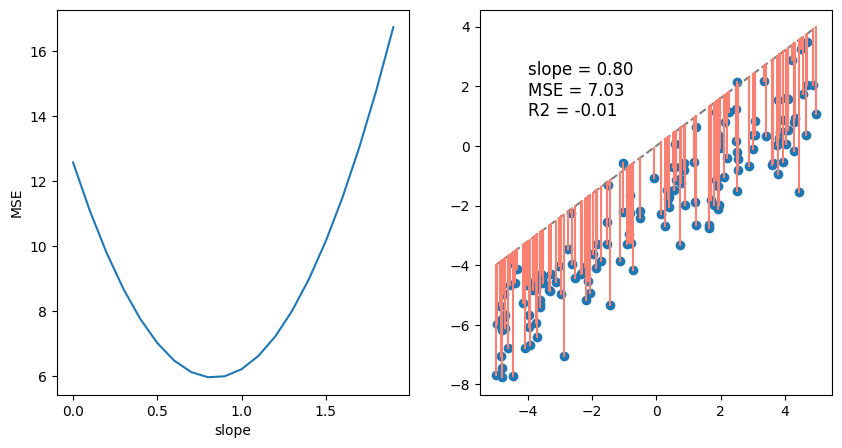

In [6]:
theta = np.arange(0, 2, 0.1)
MSE = np.zeros_like(theta)
R2 = np.zeros_like(theta)

for k, slope in enumerate(theta):
    model = linear_model(w1=slope, w0=0)
    y_pred = model(X)
    residuals = y - y_pred
    MSE[k] = calc_MSE(y, y_pred)
    R2[k] = calc_R2(y, y_pred)

theta_best = theta[np.argmin(MSE)]
model_best = linear_model(w1=theta_best, w0=0)
y_pred = model_best(X)

fig, ax = plt.subplots(1,2, figsize = (10, 5))  
ax[0].plot(theta, MSE, label='MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('slope')


plt.scatter(X, y)
plt.plot(X, y_pred, color='gray', linestyle = '--')
plt.plot(np.vstack((X, X)), np.vstack((y_pred, y)), color='salmon')
plt.text(-4, 1, f'slope = {theta_best:.2f}\nMSE = {MSE_1:.2f}\nR2 = {R_1:.2f}', fontsize=12)
plt.show()




(np.int64(28), np.int64(8))


/var/folders/qm/g7x838zs775f4j_5s231csf80000gn/T/ipykernel_86568/2395495076.py:25: UserWarning: The following kwargs were not used by contour: 'shading'
  c = ax.contourf(Theta_1, Theta_0, MSE, shading='auto')


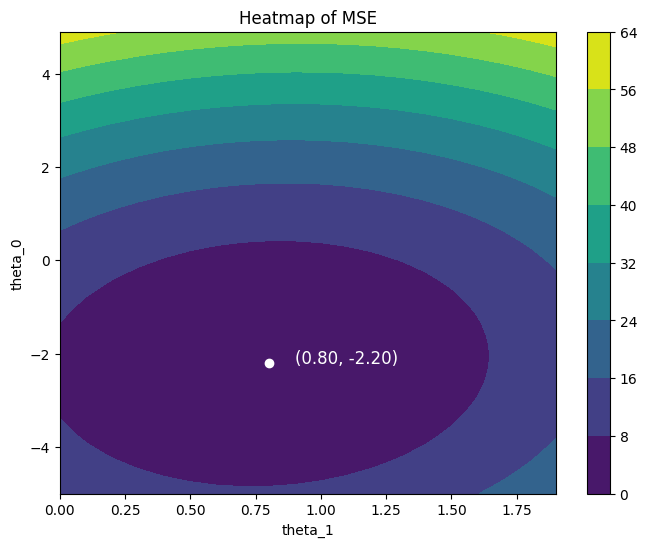

In [7]:
theta_1 = np.arange(0, 2, 0.1)
theta_0 = np.arange(-5, 5, 0.1)

Theta_1, Theta_0 = np.meshgrid(theta_1, theta_0)

MSE = np.zeros_like(Theta_1)
R2 = np.zeros_like(Theta_1)

for i in range(Theta_1.shape[0]):
    for j in range(Theta_1.shape[1]):
        model = linear_model(w1=Theta_1[i, j], w0=Theta_0[i, j])
        y_pred = model(X)
        residuals = y - y_pred
        MSE[i, j] = calc_MSE(y, y_pred)
        R2[i, j] = calc_R2(y, y_pred)

theta_best_idx = np.unravel_index(np.argmin(MSE), Theta_1.shape)
print(theta_best_idx)

theta_1_best = theta_1[theta_best_idx[1]]
theta_0_best = theta_0[theta_best_idx[0]]

fig, ax = plt.subplots(figsize=(8, 6))

c = ax.contourf(Theta_1, Theta_0, MSE, shading='auto')
fig.colorbar(c, ax=ax)

ax.plot(theta_1_best, theta_0_best, 'wo')
ax.text(theta_1_best + 0.1, theta_0_best, f'({theta_1_best:.2f}, {theta_0_best:.2f})', fontsize=12, color = 'white')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_0')
ax.set_title('Heatmap of MSE')
plt.show()

/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


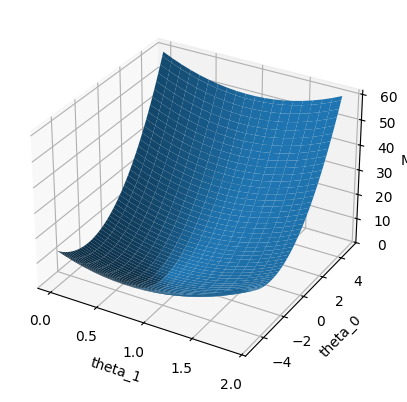

In [8]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(Theta_1, Theta_0, MSE,
                       linewidth=0)

ax.set_xlabel('theta_1')
ax.set_ylabel('theta_0')
ax.set_zlabel('MSE')

plt.show()

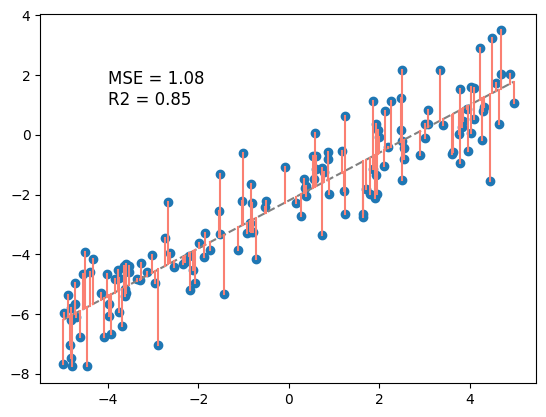

In [9]:
model_best = linear_model(w1=theta_1_best, w0=theta_0_best)

y_pred = model_best(X)

residuals = y - y_pred
MSE_best = calc_MSE(y, y_pred)
R2_best = calc_R2(y, y_pred)

plt.scatter(X, y)
plt.plot(X, y_pred, color='gray', linestyle = '--')
plt.plot(np.vstack((X, X)), np.vstack((y_pred, y)), color='salmon')
plt.text(-4, 1, f'MSE = {MSE_best:.2f}\nR2 = {R2_best:.2f}', fontsize=12)
plt.show()

## Linear Regression with Scikit-learn

In [10]:
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

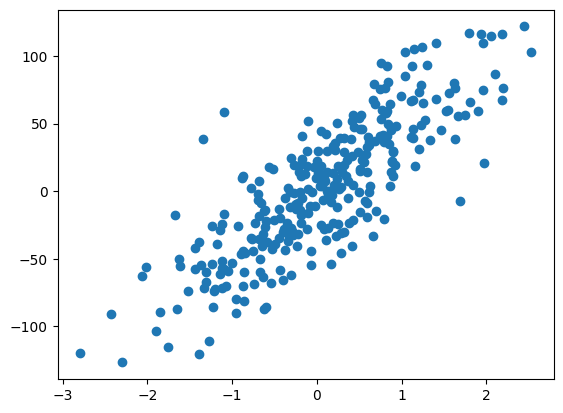

In [11]:
X, y = make_regression(n_samples=300, n_features=1, noise=30, random_state=1)
sort_idx = np.argsort(X, axis=0).flatten()
X = X[sort_idx]
y = y[sort_idx]

fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
plt.show()


### Modeling process

For this example, we are only fitting a simple linear regression. We are not comparing different candidate models, so we will not be conducting any model *validation*.

 - Split the data into training and testing sets.
 - Select the candidate model and fit the parameters to the data (training).
 - Assess the model performance (e.g. $R^2$)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Make predictions
# Generally, we make decisions about the model based on the predictions from the test set.
y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)
y_pred = model_LR.predict(X)

# Assess the model
MSE_train = mean_squared_error(y_train, y_pred_train)
R2_train = model_LR.score(X_train, y_train)

MSE_test = mean_squared_error(y_test, y_pred_test)
R2_test = model_LR.score(X_test, y_test)


print(f'model coefficients: {model_LR.coef_}, {model_LR.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

model_LR.__dict__


model coefficients: [46.1808004], -0.21479415831364035
MSE_test = 987.10, MSE_train = 753.65
R2_test = 0.61, R2_train = 0.71


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([46.1808004]),
 'rank_': 1,
 'singular_': array([14.28453481]),
 'intercept_': np.float64(-0.21479415831364035)}

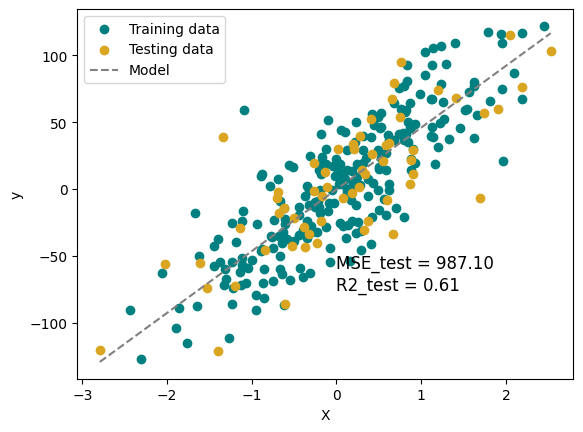

In [20]:
plt.scatter(X_train, y_train, color='teal', label='Training data')
plt.scatter(X_test, y_test, color='goldenrod', label='Testing data')
plt.plot(X, y_pred, color='gray', linestyle = '--', label='Model')

plt.xlabel('X')
plt.ylabel('y')
plt.text(0, -75, f'MSE_test = {MSE_test:.2f}\nR2_test = {R2_test:.2f}', fontsize=12)

plt.legend()
plt.show()

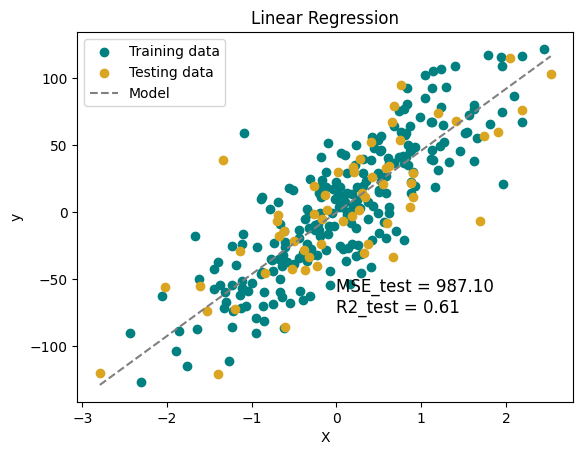

In [21]:
plt.scatter(X_train, y_train, color='teal', label='Training data')
plt.scatter(X_test, y_test, color='goldenrod', label='Testing data')
plt.plot(X, y_pred, color='gray', linestyle = '--', label='Model')

plt.xlabel('X')
plt.ylabel('y')
plt.text(0, -75, f'MSE_test = {MSE_test:.2f}\nR2_test = {R2_test:.2f}', fontsize=12)
plt.title('Linear Regression')
plt.legend()
plt.show()

### Assumptions

 - *Linearity* - the independent and dependent variables are actually linearly related
 - *Independence* - the observations (samples) are independent of each other
 - *Homoscedasticity* - variance of the errors are uniform across the different values of each independent variable
 - *Normality* - the errors are normal
 - *No collinearity* - the features are not linearly dependent to each other
 
 We will hardly ever encounter data that meets all these assumptions. For some violations, there are workarounds. Others, we acknowledge and accept...or we choose a different type of regression model.
 <br>

 Let's test the Homoscedasticity and Normality assumptions.

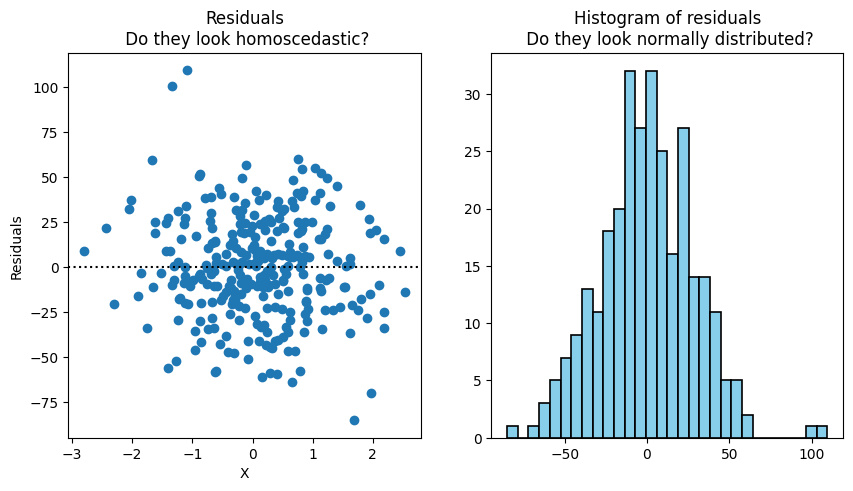

In [22]:
residuals = y - y_pred

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(X, residuals, 'o')   
ax[0].axhline(0, color='k', linestyle = ':')
ax[0].set_title('Residuals\n Do they look homoscedastic?')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Residuals')

ax[1].hist(residuals, bins=30, color='skyblue', edgecolor='black', linewidth=1.2)
ax[1].set_title('Histogram of residuals\n Do they look normally distributed?')
plt.show()
